In [1]:
import sys
sys.path += ["../src"]
import climact_utils as cu
# import features_cox_week as ft
import logistic_regression_activation as L
import pandas as pd
from glob import glob
import numpy as np
import cox_logreg_experiments as cle
import create_features_df

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
from importlib import reload

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots as sbp

In [4]:
exp_path = cu.data_path + "experiments_logreg"

In [6]:
# for subreddit_class in cu.subreddit_classes:
#     print(subreddit_class)
#     lr = L.LogisticRegression_activation(subreddit_class)
#     lr.load_data()
#     df = lr.df
#     df.to_csv(cu.data_path + f"authors_featurs_df/{subreddit_class}.csv.gz", compression = "gzip")


In [7]:
n_components_dict = {'control_short': 5,
 'control_medium': 5,
 'control_long': 5,
 'control_short_long_ratio': 5,
 'interaction_short': 8,
 'interaction_medium': 8,
 'interaction_long': 8,
 'interaction_short_long_ratio': 8,
 'norm_news_short': 3,
 'norm_news_medium': 3,
 'norm_news_long': 3,
 'norm_news_short_long_ratio': 3,
 'subreddit_short': 32,
 'subreddit_medium': 32,
 'subreddit_long': 32,
 'subreddit_short_long_ratio': 32,
 'sociodemo': 8}

lrs_sep = {subreddit_class: L.LogisticRegression_separate_pca(subreddit_class) for subreddit_class in cu.subreddit_classes}

lrs_merge = {subreddit_class: L.LogisticRegression_activation(subreddit_class) for subreddit_class in cu.subreddit_classes}

In [8]:
# for subreddit_class in cu.subreddit_classes:
#     print(subreddit_class)
#     lrs[subreddit_class].load_data()
#     df = lrs[subreddit_class].df
#     df.to_csv(cu.data_path + f"authors_featurs_df/{subreddit_class}.csv.gz", compression = "gzip")


for subreddit_class in cu.subreddit_classes:
    print(subreddit_class)
    lrs_sep[subreddit_class].df = pd.read_csv(cu.data_path + f"authors_featurs_df/{subreddit_class}.csv.gz", 
                                       compression = "gzip", index_col = [0,1])
    lrs_merge[subreddit_class].df = pd.read_csv(cu.data_path + f"authors_featurs_df/{subreddit_class}.csv.gz", 
                                       compression = "gzip", index_col = [0,1])

activism
action
discussion
skeptic


In [9]:
for subreddit_class in cu.subreddit_classes:
    print(lrs_sep[subreddit_class].df["activation"].value_counts())

activation
True     4113
False    4113
Name: count, dtype: int64
activation
True     6468
False    6468
Name: count, dtype: int64
activation
True     11497
False    11497
Name: count, dtype: int64
activation
True     3985
False    3985
Name: count, dtype: int64


In [27]:
# exp_sep_pca = {subreddit_class: lrs_sep[subreddit_class].repeated_bootstrap(n_samples = 100, n_components_dict = n_components_dict, test = True) 
            #   for subreddit_class in cu.subreddit_classes}
exp_merge_pca = {subreddit_class: lrs_merge[subreddit_class].repeated_bootstrap(n_samples = 10, n_components = 32, test = True) 
              for subreddit_class in cu.subreddit_classes}

In [28]:
[exp_merge_pca[s][1] for s in cu.subreddit_classes]

[                     mean       std
 accuracy         0.698071  0.014805
 precision        0.747334  0.012604
 recall           0.594654  0.025774
 random_baseline  0.507558  0.003506,
                      mean       std
 accuracy         0.648450  0.009965
 precision        0.687080  0.015127
 recall           0.551724  0.022094
 random_baseline  0.507762  0.004452,
                      mean       std
 accuracy         0.615615  0.003998
 precision        0.638216  0.009547
 recall           0.543749  0.018155
 random_baseline  0.505913  0.003121,
                      mean       std
 accuracy         0.713719  0.013032
 precision        0.769035  0.019785
 recall           0.617609  0.020723
 random_baseline  0.509344  0.006471]

In [11]:
# for subreddit_class in cu.subreddit_classes:
#     exp_sep_pca[subreddit_class][0].to_csv(cu.data_path + f"experiments_logreg/lr_coef_{subreddit_class}_100boot_32compsubreddits_all_240731.csv")
#     exp_sep_pca[subreddit_class][1].to_csv(cu.data_path + f"experiments_logreg/lr_perf_{subreddit_class}_100boot_32compsubreddits_all_240731.csv")


# for subreddit_class in cu.subreddit_classes:
#     exp_merge_pca[subreddit_class][0].to_csv(cu.data_path + f"experiments_logreg/lr_coef_{subreddit_class}_100boot_32components_all_240731.csv")
#     exp_merge_pca[subreddit_class][1].to_csv(cu.data_path + f"experiments_logreg/lr_perf_{subreddit_class}_100boot_32components_all_240731.csv")

In [26]:
exp_sep_pca = {}
for subreddit_class in cu.subreddit_classes:
    exp_sep_pca[subreddit_class] = [
        pd.read_csv(cu.data_path + f"experiments_logreg/lr_coef_{subreddit_class}_100boot_32compsubreddits_all_240731.csv", index_col = 0).assign(significant = lambda x: x["CI_lower"] * x["CI_upper"] > 0).drop_duplicates(),
        pd.read_csv(cu.data_path + f"experiments_logreg/lr_perf_{subreddit_class}_100boot_32compsubreddits_all_240731.csv", index_col = 0).drop_duplicates()
    ]


In [23]:
exp_merge_pca = {}
for subreddit_class in cu.subreddit_classes:
    exp_merge_pca[subreddit_class] = [
        pd.read_csv(cu.data_path + f"experiments_logreg/lr_coef_{subreddit_class}_100boot_32components_all_240731.csv", index_col = 0).assign(significant = lambda x: x["CI_lower"] * x["CI_upper"] > 0),
        pd.read_csv(cu.data_path + f"experiments_logreg/lr_perf_{subreddit_class}_100boot_32components_all_240731.csv", index_col = 0).drop_duplicates()
    ]


In [14]:
for subreddit_class in cu.subreddit_classes:
    print(exp_sep_pca[subreddit_class][1])

                     mean       std
accuracy         0.734143  0.009947
precision        0.754505  0.014393
recall           0.694582  0.018086
random_baseline  0.509193  0.006448
                     mean       std
accuracy         0.690423  0.008295
precision        0.703589  0.012864
recall           0.659387  0.015662
random_baseline  0.507580  0.005679
                     mean       std
accuracy         0.635872  0.006646
precision        0.649785  0.009369
recall           0.590190  0.014535
random_baseline  0.505186  0.003692
                     mean       std
accuracy         0.736441  0.010921
precision        0.766285  0.015175
recall           0.679331  0.019535
random_baseline  0.508763  0.006335


In [13]:
for subreddit_class in cu.subreddit_classes:
    print(exp_merge_pca[subreddit_class][1])

                     mean       std
accuracy         0.697705  0.012206
precision        0.745807  0.016349
recall           0.599126  0.021626
random_baseline  0.509519  0.006568
                     mean       std
accuracy         0.649932  0.009754
precision        0.687274  0.014435
recall           0.555532  0.020008
random_baseline  0.507465  0.005977
                     mean       std
accuracy         0.615136  0.007180
precision        0.635552  0.012162
recall           0.540165  0.018662
random_baseline  0.505335  0.004170
                     mean       std
accuracy         0.712889  0.010672
precision        0.769625  0.014591
recall           0.611225  0.019982
random_baseline  0.508251  0.006037


In [15]:
interesting_features = [z for u in ["interaction", "norm_news"] for w in cu.features_time[u].values() for z in w] + cu.features["sociodemo"]

#### Activism

In [62]:
subreddit_class = "activism"

In [64]:
exp_sep_pca[subreddit_class][0].loc[interesting_features]

,coef,CI_lower,CI_upper,significant
n_different_comments_with_active_parent_id_parent_id_short,-0.008484,-0.241919,0.184909,False
n_different_comments_with_active_link_id_link_id_short,-0.143887,-0.294855,-0.013027,True
n_different_comments_with_active_parent_id_id_short,-0.198157,-0.662860,0.209154,False
n_different_comments_with_active_id_parent_id_short,0.133181,-0.185264,0.523896,False
n_different_active_authors_parent_id_parent_id_short,-0.045791,-0.210643,0.111358,False
n_different_active_authors_link_id_link_id_short,0.332337,0.138918,0.539418,True
n_different_active_authors_parent_id_id_short,0.433278,0.130557,0.770837,True
n_different_active_authors_id_parent_id_short,0.073976,-0.223059,0.422089,False
n_different_comments_with_active_parent_id_parent_id_medium,-0.168051,-0.451370,0.003112,False
n_different_comments_with_active_link_id_link_id_medium,-0.032016,-0.426858,0.150876,False


In [86]:
exp_sep_pca[subreddit_class][0].loc[interesting_features].query("significant").assign(abs_coef = lambda x: np.abs(x["coef"])).sort_values("abs_coef", ascending = False)

,coef,CI_lower,CI_upper,significant,abs_coef
n_different_active_authors_id_parent_id_short,0.038254,0.028803,0.047654,True,0.038254
n_different_active_authors_parent_id_id_short,0.037862,0.025672,0.049467,True,0.037862
n_different_active_authors_id_parent_id_medium,0.036418,0.027743,0.047621,True,0.036418
n_different_comments_with_active_parent_id_id_short,0.034202,0.023020,0.048656,True,0.034202
n_different_active_authors_parent_id_id_medium,0.033634,0.022318,0.048563,True,0.033634
n_different_comments_with_active_id_parent_id_medium,0.032560,0.023270,0.044087,True,0.032560
n_different_comments_with_active_id_parent_id_short,0.031760,0.021254,0.042530,True,0.031760
n_different_comments_with_active_parent_id_id_medium,0.029287,0.018292,0.046612,True,0.029287
n_different_active_authors_id_parent_id_long,0.024693,0.014465,0.034814,True,0.024693
n_different_active_authors_link_id_link_id_short,0.024509,0.016466,0.031980,True,0.024509


In [87]:
exp_sep_pca[subreddit_class][0].loc[[u for u in exp_sep_pca[subreddit_class][0].index if u[0] == "r"],:].sort_values("coef").assign(abs_coef = lambda x: np.abs(x["coef"])).sort_values("abs_coef", ascending = False).head(15)

,coef,CI_lower,CI_upper,significant,abs_coef
rChapoTrapHouse_medium,0.027384,0.021372,0.033079,True,0.027384
rCOMPLETEANARCHY_medium,0.027306,0.021932,0.034535,True,0.027306
rChapoTrapHouse_short,0.026815,0.020477,0.033335,True,0.026815
rChapoTrapHouse_long,0.026070,0.019482,0.031990,True,0.026070
rCOMPLETEANARCHY_long,0.025638,0.019968,0.032233,True,0.025638
rCOMPLETEANARCHY_short,0.024500,0.018472,0.032031,True,0.024500
rAnarchism_medium,0.024409,0.018310,0.031353,True,0.024409
rAnarchism_long,0.023910,0.018188,0.029505,True,0.023910
rsocialism_medium,0.022701,0.016225,0.029460,True,0.022701
rsocialism_long,0.022590,0.016425,0.030178,True,0.022590


#### Action

In [88]:
subreddit_class = "action"

In [89]:
exp_sep_pca[subreddit_class][0].loc[interesting_features].query("significant").assign(abs_coef = lambda x: np.abs(x["coef"])).sort_values("abs_coef", ascending = False)

,coef,CI_lower,CI_upper,significant,abs_coef
n_different_active_authors_parent_id_id_short,0.033888,0.019040,0.044001,True,0.033888
n_different_active_authors_id_parent_id_short,0.029215,0.018691,0.039039,True,0.029215
n_different_active_authors_parent_id_id_medium,0.028758,0.012640,0.041245,True,0.028758
n_different_comments_with_active_parent_id_id_short,0.028435,0.010623,0.040967,True,0.028435
n_different_comments_with_active_id_parent_id_short,0.025552,0.015658,0.035348,True,0.025552
n_different_active_authors_id_parent_id_medium,0.024984,0.016209,0.033942,True,0.024984
n_different_comments_with_active_parent_id_id_medium,0.023627,0.005364,0.036828,True,0.023627
n_different_comments_with_active_id_parent_id_medium,0.018722,0.011148,0.030630,True,0.018722
n_different_active_authors_id_parent_id_short_long_ratio,0.018065,0.009677,0.029600,True,0.018065
n_different_active_authors_parent_id_id_short_long_ratio,0.017855,0.009322,0.029802,True,0.017855


In [90]:
exp_sep_pca[subreddit_class][0].loc[[u for u in exp_sep_pca[subreddit_class][0].index if u[0] == "r"]].query("significant").assign(abs_coef = lambda x: np.abs(x["coef"])).sort_values("abs_coef", ascending = False).head(15)

,coef,CI_lower,CI_upper,significant,abs_coef
renvironment_short,0.019982,0.013699,0.027514,True,0.019982
rcollapse_short,0.019833,0.014116,0.025666,True,0.019833
renvironment_medium,0.019791,0.014395,0.026153,True,0.019791
rcollapse_medium,0.019783,0.014326,0.025961,True,0.019783
rAnticonsumption_medium,0.015785,0.010203,0.022132,True,0.015785
rclimate_medium,0.015691,0.010865,0.021840,True,0.015691
rDemocraticSocialism_medium,0.015563,0.009514,0.023005,True,0.015563
rclimate_short,0.015401,0.008588,0.021253,True,0.015401
rlostgeneration_short,0.015099,0.009283,0.022163,True,0.015099
rDemocraticSocialism_short,0.014575,0.007825,0.021762,True,0.014575


#### Discussion

In [91]:
subreddit_class = "discussion"

In [92]:
exp_sep_pca[subreddit_class][0].loc[interesting_features].query("significant").assign(abs_coef = lambda x: np.abs(x["coef"])).sort_values("abs_coef", ascending = False)

,coef,CI_lower,CI_upper,significant,abs_coef
norm_climate_action_short,0.016952,0.011146,0.024036,True,0.016952
norm_climate_action_medium,0.016502,0.011479,0.023103,True,0.016502
norm_climate_short,0.015615,0.009716,0.023334,True,0.015615
n_different_active_authors_link_id_link_id_short,0.014976,0.011443,0.019005,True,0.014976
n_different_active_authors_parent_id_parent_id_short,0.014860,0.011289,0.019276,True,0.014860
norm_climate_medium,0.014370,0.009188,0.021646,True,0.014370
norm_climate_action_long,0.012718,0.009639,0.016142,True,0.012718
norm_climate_short_long_ratio,0.012170,0.007399,0.018010,True,0.012170
n_different_active_authors_parent_id_parent_id_medium,0.011993,0.008531,0.015179,True,0.011993
n_different_active_authors_link_id_link_id_medium,0.010657,0.007511,0.013596,True,0.010657


In [93]:
exp_sep_pca[subreddit_class][0].loc[[u for u in exp_sep_pca[subreddit_class][0].index if u[0] == "r"]].query("significant").assign(abs_coef = lambda x: np.abs(x["coef"])).sort_values("abs_coef", ascending = False).head(15)

,coef,CI_lower,CI_upper,significant,abs_coef
rantiwork_medium,0.014344,0.011305,0.017470,True,0.014344
rantiwork_short,0.014079,0.010849,0.017741,True,0.014079
rcollapse_short,0.011610,0.008395,0.014163,True,0.011610
rgifs_long,-0.011538,-0.013581,-0.009576,True,0.011538
rcollapse_medium,0.011516,0.008718,0.013810,True,0.011516
rvideos_long,-0.011460,-0.013271,-0.009407,True,0.011460
renvironment_short,0.011373,0.008491,0.014495,True,0.011373
rantiwork_long,0.011275,0.009178,0.013789,True,0.011275
rIAmA_long,-0.010676,-0.012517,-0.009181,True,0.010676
reconomy_short,0.010118,0.007024,0.014544,True,0.010118


#### Skeptic

In [94]:
subreddit_class = "skeptic"

In [95]:
exp_sep_pca[subreddit_class][0].loc[interesting_features].query("significant").assign(abs_coef = lambda x: np.abs(x["coef"])).sort_values("abs_coef", ascending = False)

,coef,CI_lower,CI_upper,significant,abs_coef
n_different_active_authors_parent_id_id_short,0.050220,0.033959,0.065737,True,0.050220
n_different_active_authors_parent_id_id_medium,0.047376,0.030620,0.062250,True,0.047376
n_different_comments_with_active_parent_id_id_short,0.046690,0.022512,0.065819,True,0.046690
n_different_active_authors_id_parent_id_medium,0.045404,0.033014,0.058349,True,0.045404
n_different_active_authors_id_parent_id_short,0.044167,0.034172,0.055482,True,0.044167
n_different_comments_with_active_parent_id_id_medium,0.043938,0.020131,0.062570,True,0.043938
n_different_comments_with_active_id_parent_id_medium,0.037448,0.026376,0.051230,True,0.037448
n_different_comments_with_active_parent_id_id_long,0.035563,0.009929,0.052362,True,0.035563
n_different_comments_with_active_id_parent_id_short,0.035488,0.025916,0.046417,True,0.035488
n_different_active_authors_id_parent_id_long,0.035130,0.025081,0.044405,True,0.035130


In [96]:
exp_sep_pca[subreddit_class][0].loc[[u for u in exp_sep_pca[subreddit_class][0].index if u[0] == "r"]].query("significant").assign(abs_coef = lambda x: np.abs(x["coef"])).sort_values("abs_coef", ascending = False).head(25)

,coef,CI_lower,CI_upper,significant,abs_coef
rConservative_medium,0.034321,0.027926,0.042211,True,0.034321
rtucker_carlson_medium,0.032509,0.025677,0.040594,True,0.032509
rconservatives_medium,0.032331,0.023218,0.041302,True,0.032331
rConservative_short,0.032295,0.024639,0.039870,True,0.032295
rLouderWithCrowder_medium,0.032090,0.023672,0.041291,True,0.032090
rAnarcho_Capitalism_medium,0.032045,0.023955,0.039376,True,0.032045
rThe_Donald_long,0.031916,0.025671,0.037404,True,0.031916
rprogun_medium,0.031842,0.022366,0.040830,True,0.031842
rThe_Donald_medium,0.029915,0.024307,0.036313,True,0.029915
rprogun_long,0.029560,0.021418,0.037329,True,0.029560


### Comparison

In [29]:
performances_sep_dict = {subreddit_class: pd.read_csv(cu.data_path + f"experiments_logreg/lr_perf_{subreddit_class}_100boot_32compsubreddits_all_240731.csv", index_col = [0]) for subreddit_class in cu.subreddit_classes}
coef_sep_dict = {subreddit_class: pd.read_csv(cu.data_path + f"experiments_logreg/lr_coef_{subreddit_class}_100boot_32compsubreddits_all_240731.csv", index_col = [0]) for subreddit_class in cu.subreddit_classes}

performances_merge_dict = {subreddit_class: pd.read_csv(cu.data_path + f"experiments_logreg/lr_perf_{subreddit_class}_100boot_32components_all_240731.csv", index_col = [0]) for subreddit_class in cu.subreddit_classes}
coef_merge_dict = {subreddit_class: pd.read_csv(cu.data_path + f"experiments_logreg/lr_coef_{subreddit_class}_100boot_32components_all_240731.csv", index_col = [0]) for subreddit_class in cu.subreddit_classes}


In [5]:
performances_sep_df = pd.concat(performances_sep_dict).unstack()
coef_sep_df = pd.concat(coef_sep_dict).unstack()
performances_merge_df = pd.concat(performances_merge_dict).unstack()
coef_merge_df = pd.concat(coef_merge_dict).unstack()

In [6]:
performances_sep_df["mean"]["accuracy"].reset_index(), performances_merge_df["mean"]["accuracy"].reset_index()

(        index  accuracy
 0    activism  0.734143
 1      action  0.690423
 2  discussion  0.635872
 3     skeptic  0.736441,
         index  accuracy
 0    activism  0.697705
 1      action  0.649932
 2  discussion  0.615136
 3     skeptic  0.712889)

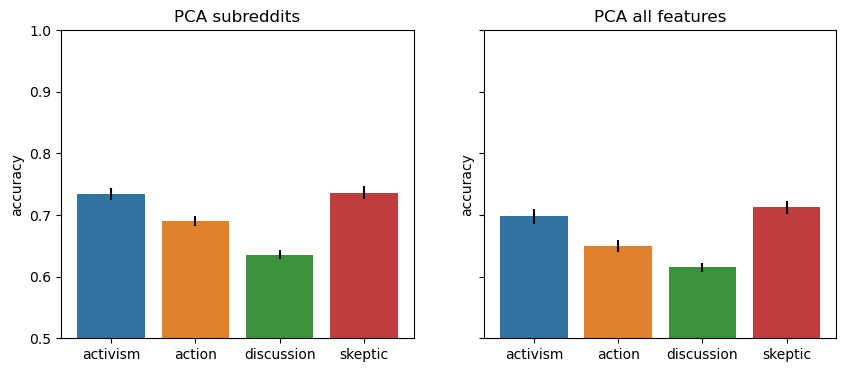

In [9]:
fig, axes = sbp(ncols = 2, nrows = 1, figsize = (10, 4), sharey = True)

for i, performances_df in enumerate([performances_sep_df, performances_merge_df]):
    sns.barplot(performances_df["mean"]["accuracy"].reset_index(), x = "index", y = "accuracy", ax = axes[i])
    axes[i].errorbar(x = performances_df["mean"].reset_index()["index"],
                y = performances_df["mean"]["accuracy"],
                yerr = performances_df["std"]["accuracy"],
                fmt = "none", c = "black")

    axes[i].set_xlabel("")
    axes[i].set_ylim([0.5, 1.])
    axes[i].set_title(["PCA subreddits", "PCA all features"][i])

    # plt.xticks(rotation = 90)

axes[0].set_ylabel("accuracy")
fig.show()

In [31]:
coef_sep_df["coef"].T.rename(index = cu.quartile_to_sociodemo).corr(),coef_merge_df["coef"].T.rename(index = cu.quartile_to_sociodemo).corr()

(            activism    action  discussion   skeptic
 activism    1.000000  0.529933    0.259013  0.154629
 action      0.529933  1.000000    0.253384  0.270872
 discussion  0.259013  0.253384    1.000000  0.069498
 skeptic     0.154629  0.270872    0.069498  1.000000,
             activism    action  discussion   skeptic
 activism    1.000000  0.729480    0.466696  0.233267
 action      0.729480  1.000000    0.552902  0.152819
 discussion  0.466696  0.552902    1.000000  0.270674
 skeptic     0.233267  0.152819    0.270674  1.000000)

In [21]:
coef_sep_df["coef"].T.rename(index = cu.quartile_to_sociodemo).loc[interesting_features].corr(), coef_merge_df["coef"].T.rename(index = cu.quartile_to_sociodemo).loc[interesting_features].corr()

(            activism    action  discussion   skeptic
 activism    1.000000  0.407878    0.142494  0.027565
 action      0.407878  1.000000   -0.038438 -0.057231
 discussion  0.142494 -0.038438    1.000000 -0.130728
 skeptic     0.027565 -0.057231   -0.130728  1.000000,
             activism    action  discussion   skeptic
 activism    1.000000  0.912485    0.156747  0.744108
 action      0.912485  1.000000    0.258751  0.659863
 discussion  0.156747  0.258751    1.000000 -0.142846
 skeptic     0.744108  0.659863   -0.142846  1.000000)

In [32]:
exp_sep_pca["activism"][0]

,coef,CI_lower,CI_upper,significant
avg_comments_per_thread_short,-0.000249,-0.230847,0.197954,False
n_submissions_author_week_short,0.199395,-0.177855,0.572592,False
n_active_days_author_week_short,0.105060,-0.061917,0.309974,False
n_comments_author_week_short,0.008324,-0.159360,0.246775,False
n_different_subreddits_short,0.461552,0.059085,0.864540,True
...,...,...,...,...
sociodemo_female,0.009985,-0.057916,0.086570,False
sociodemo_left,0.005708,-0.062641,0.062228,False
sociodemo_right,-0.086893,-0.138372,-0.020071,True
sociodemo_poor,0.001544,-0.063350,0.080117,False


In [33]:
significant_sep_coefs = pd.concat([exp_sep_pca[subreddit_class][0].rename(columns = {"significant": subreddit_class})[subreddit_class] for subreddit_class in cu.subreddit_classes], axis = True)

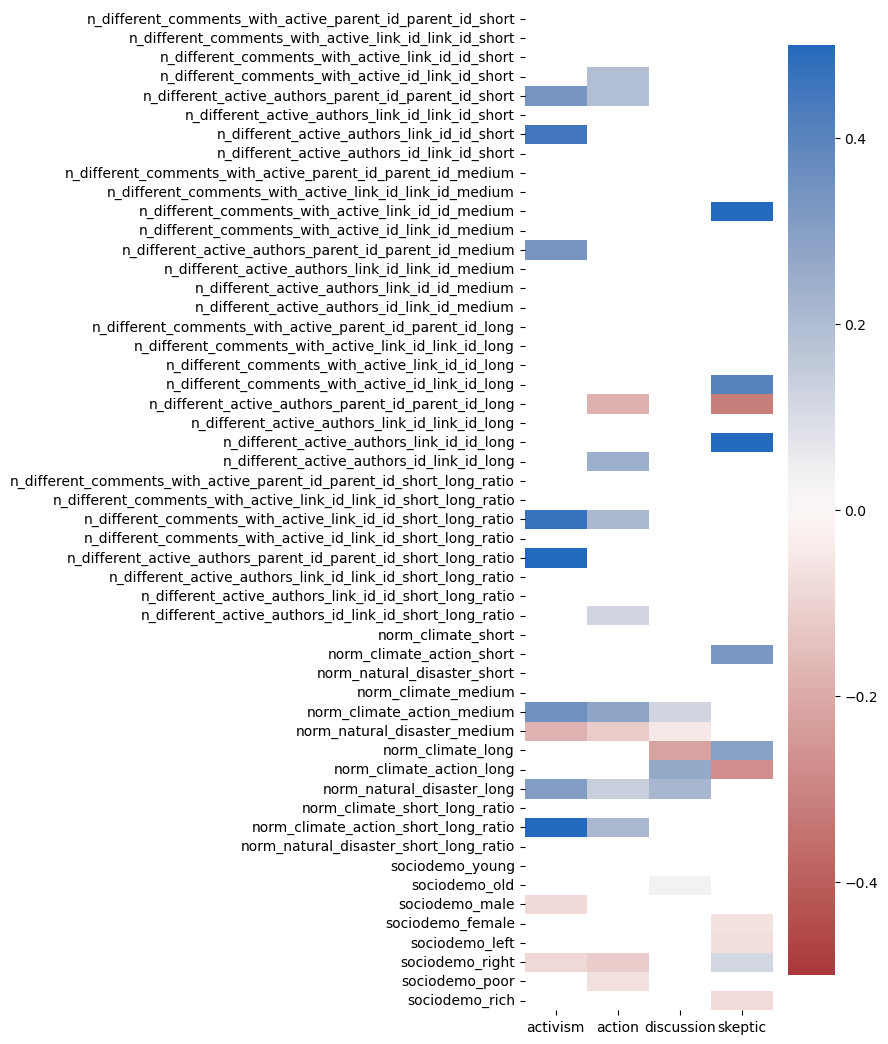

In [34]:
fig, axes = sbp(figsize = (4, 13))
sns.heatmap(pd.concat([exp_sep_pca[subreddit_class][0].drop_duplicates().rename(columns = {"coef": subreddit_class})[subreddit_class] for subreddit_class in cu.subreddit_classes], axis = 1)
            .loc[[u for u in interesting_features if "n_different_parent_id" not in u]],
            mask = (1-significant_sep_coefs.loc[[u for u in interesting_features if "n_different_parent_id" not in u]]),
            vmin = -0.5, vmax = 0.5, cmap = "vlag_r",            
            ).set_facecolor('white')

fig.show()

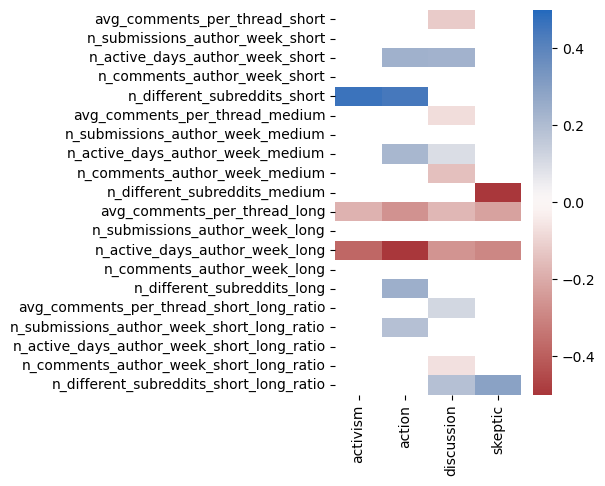

In [35]:
fig, axes = sbp(figsize = (3, 5))
sns.heatmap(pd.concat([exp_sep_pca[subreddit_class][0].rename(columns = {"coef": subreddit_class})[subreddit_class] for subreddit_class in cu.subreddit_classes], axis = 1)
            .loc[[u for p in cu.features_time["control"] for u in cu.features_time["control"][p]]],
            mask = (1-significant_sep_coefs.loc[[u for p in cu.features_time["control"] for u in cu.features_time["control"][p]]]),
            vmin = -0.5, vmax = 0.5, cmap = "vlag_r",            
            ).set_facecolor('white')

fig.show()

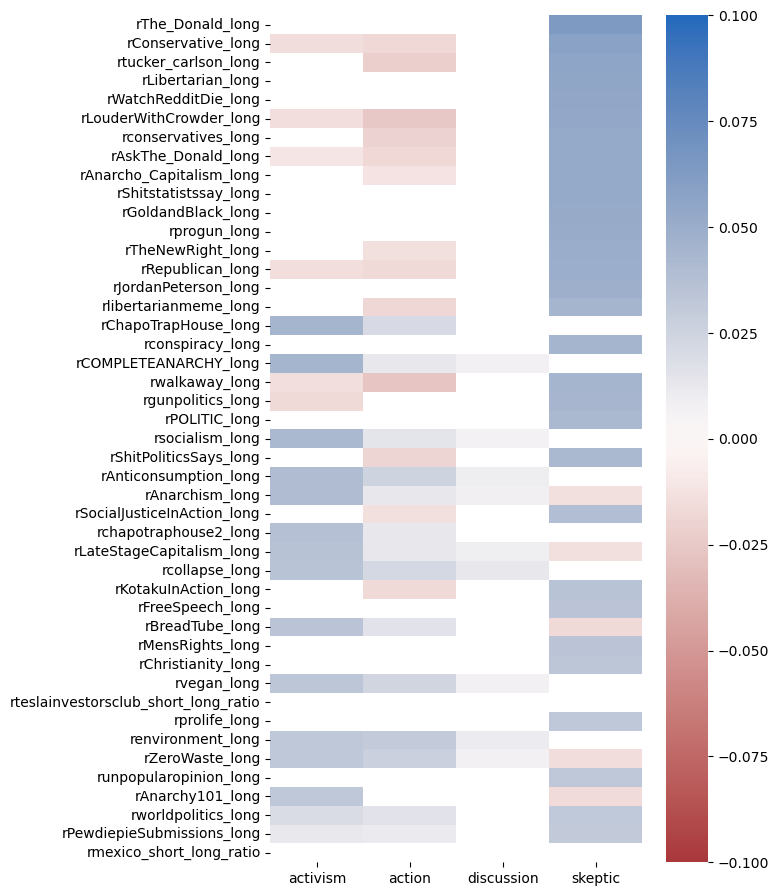

In [36]:
pop_subreddits_coefs = (pd.concat([exp_sep_pca[subreddit_class][0].rename(columns = {"coef": subreddit_class})[subreddit_class] for subreddit_class in cu.subreddit_classes], axis = 1)
                        .assign(max = lambda x: x.max(axis = 1))
                        .assign(l2_sum = lambda x: (x ** 2).sum(axis = 1))
                        .loc[[u for u in exp_sep_pca["activism"][0].index if u[0] == "r"]]
                        .sort_values("max", ascending = False)
                        .head(45).drop(["l2_sum", "max"], axis = 1))
fig, axes = sbp(figsize = (6, 11))
sns.heatmap(pop_subreddits_coefs,
            vmin = -0.1, vmax = 0.1, cmap = "vlag_r", 
            mask = 1-significant_sep_coefs.loc[pop_subreddits_coefs.index],)
fig.show()


In [37]:
significant_merge_coefs = pd.concat([exp_merge_pca[subreddit_class][0].rename(columns = {"significant": subreddit_class})[subreddit_class] for subreddit_class in cu.subreddit_classes], axis = True)

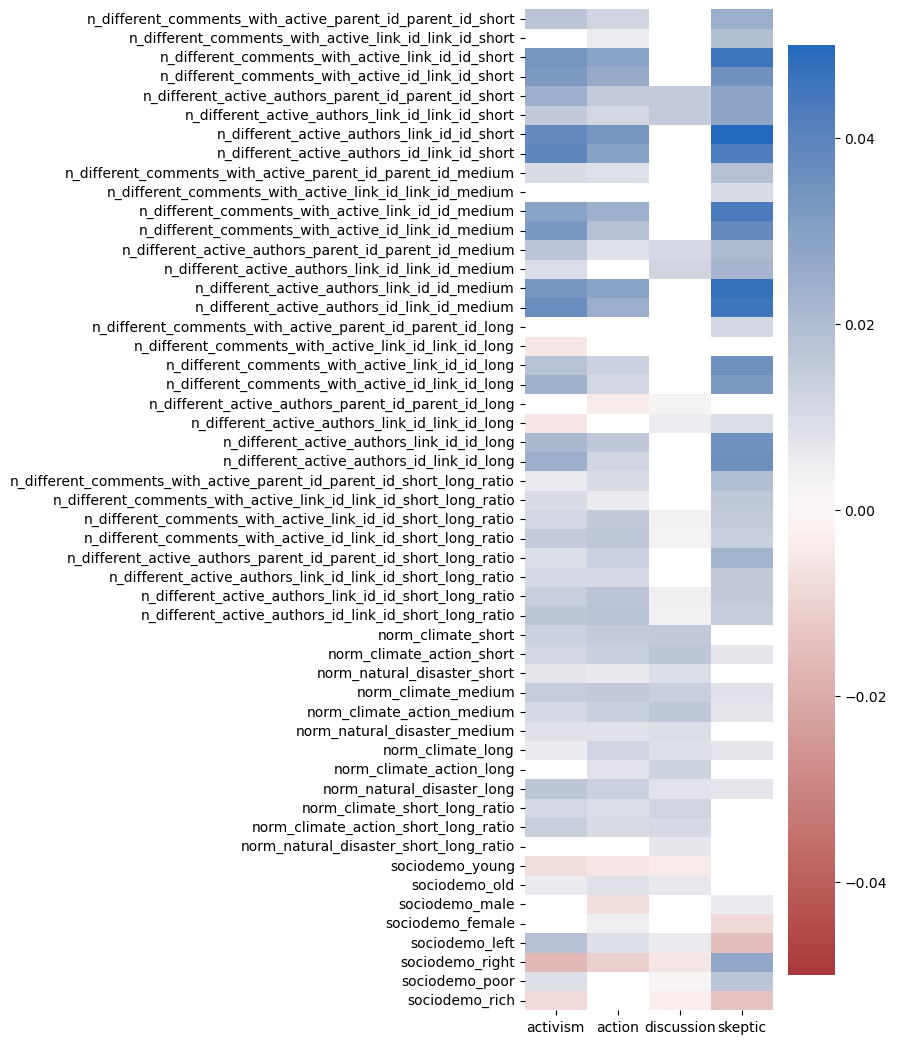

In [38]:
fig, axes = sbp(figsize = (4, 13))
sns.heatmap(pd.concat([exp_merge_pca[subreddit_class][0].drop_duplicates().rename(columns = {"coef": subreddit_class})[subreddit_class] for subreddit_class in cu.subreddit_classes], axis = 1)
            .loc[[u for u in interesting_features if "n_different_parent_id" not in u]],
            mask = (1-significant_merge_coefs.loc[[u for u in interesting_features if "n_different_parent_id" not in u]]),
            vmin = -0.05, vmax = 0.05, cmap = "vlag_r",            
            ).set_facecolor('white')

fig.show()

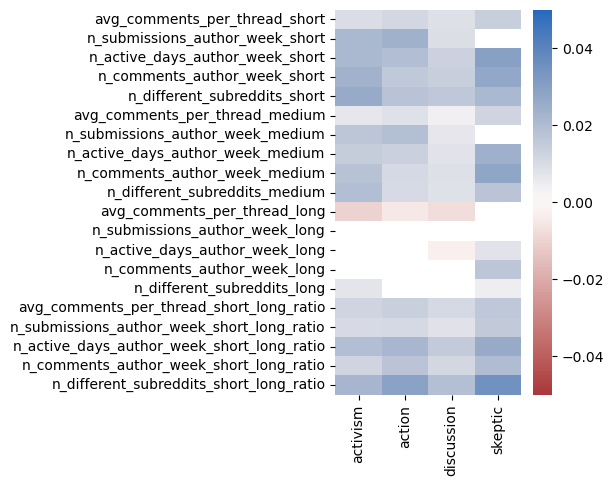

In [39]:
fig, axes = sbp(figsize = (3, 5))
sns.heatmap(pd.concat([exp_merge_pca[subreddit_class][0].rename(columns = {"coef": subreddit_class})[subreddit_class] for subreddit_class in cu.subreddit_classes], axis = 1)
            .loc[[u for p in cu.features_time["control"] for u in cu.features_time["control"][p]]],
            mask = (1-significant_merge_coefs.loc[[u for p in cu.features_time["control"] for u in cu.features_time["control"][p]]]),
            vmin = -0.05, vmax = 0.05, cmap = "vlag_r",            
            ).set_facecolor('white')

fig.show()

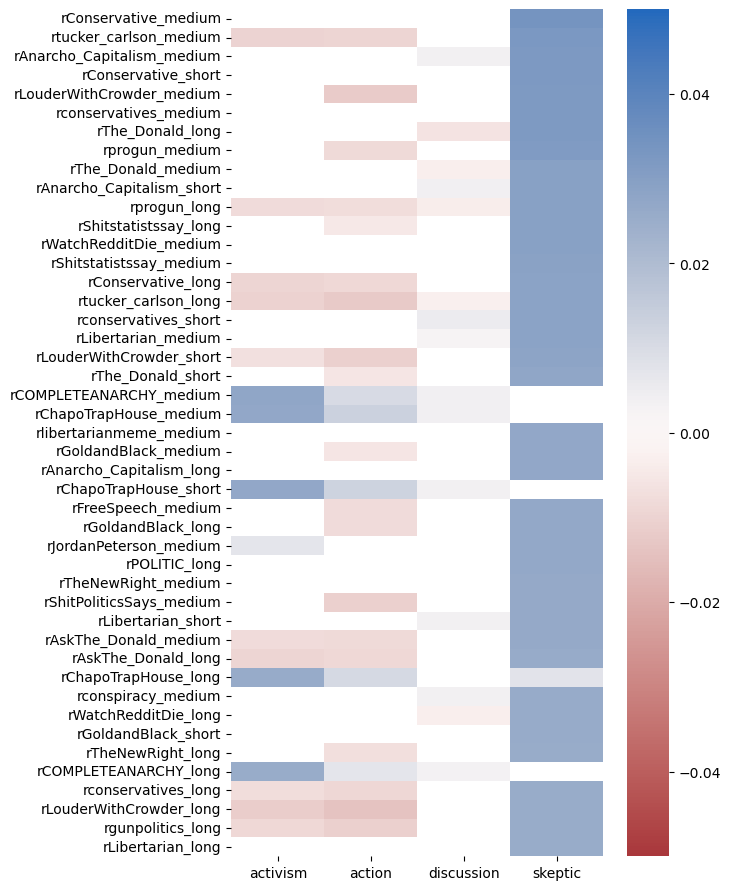

In [40]:
pop_subreddits_coefs = (pd.concat([exp_merge_pca[subreddit_class][0].rename(columns = {"coef": subreddit_class})[subreddit_class] for subreddit_class in cu.subreddit_classes], axis = 1)
                        .assign(max = lambda x: x.max(axis = 1))
                        .assign(l2_sum = lambda x: (x ** 2).sum(axis = 1))
                        .loc[[u for u in exp_merge_pca["activism"][0].index if u[0] == "r"]]
                        .sort_values("max", ascending = False)
                        .head(45).drop(["l2_sum", "max"], axis = 1))
fig, axes = sbp(figsize = (6, 11))
sns.heatmap(pop_subreddits_coefs,
            vmin = -0.05, vmax = 0.05, cmap = "vlag_r", 
            mask = 1-significant_merge_coefs.loc[pop_subreddits_coefs.index],)
fig.show()
